In [1]:
import pandas as pd
import seaborn as sns
from nltk.corpus import stopwords
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
print('hello')

hello


In [4]:
positif = pd.read_pickle(r'data/imdb_raw_pos.pickle')
negatif = pd.read_pickle(r'data/imdb_raw_neg.pickle')
print('COMMENTAIRE Positif ',len(positif))
print('COMMENTAIRE negatif', len(negatif))

COMMENTAIRE Positif  12500
COMMENTAIRE negatif 12500


In [5]:
pos = {'Critiques': positif}
neg = {'Critiques': negatif}

In [6]:
# Creates pandas DataFrame.
df1 = pd.DataFrame(pos)
df1['Sentiment'] = 'positif'
df1['Reponse'] = 1
df2 = pd.DataFrame(neg)
df2['Sentiment'] = 'Negatif'
df2['Reponse'] = 0

In [7]:
### CONCAT DATA
data = pd.concat([df1, df2])
data

,Critiques,Sentiment,Reponse
0,I went and saw this movie last night after bei...,positif,1
1,Actor turned director Bill Paxton follows up h...,positif,1
2,As a recreational golfer with some knowledge o...,positif,1
3,"I saw this film in a sneak preview, and it is ...",positif,1
4,Bill Paxton has taken the true story of the 19...,positif,1
...,...,...,...
12495,I occasionally let my kids watch this garbage ...,Negatif,0
12496,When all we have anymore is pretty much realit...,Negatif,0
12497,The basic genre is a thriller intercut with an...,Negatif,0
12498,Four things intrigued me as to this film - fir...,Negatif,0


<AxesSubplot:xlabel='Reponse', ylabel='count'>

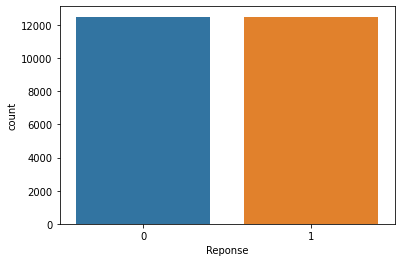

In [8]:
sns.countplot(x='Reponse', data=data)

In [9]:
# SHUFFLED DATA
shuffled = data.sample(frac=1).reset_index()
shuffled = shuffled.drop(['index'], axis=1)
print(shuffled.head(10))

                                           Critiques Sentiment  Reponse
0  Even though this movie starts off with the usu...   positif        1
1  This is a VERY good movie. I give it a 10.<br ...   positif        1
2  Leni Riefenstahl would be embarrassed by the d...   Negatif        0
3  An extremely dark and brooding show with an ex...   positif        1
4  I have always liked the Carry On films, with t...   Negatif        0
5  This is an excellent movie and I wish that the...   positif        1
6  After Matt Dillon's phenomenal performance in ...   Negatif        0
7  The acting is excellent in this film, with som...   Negatif        0
8  I caught this movie on the Horror Channel and ...   positif        1
9  I first saw this film two years ago in the cin...   positif        1


# PREPROCESSING

In [15]:
import string
import re
import nltk
import nltk.corpus
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\utilisateur\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\utilisateur\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\utilisateur\AppData\Roaming\nltk_data...


In [60]:
def Text_Cleaning(Text):
  # Lowercase the texts
  Text = Text.lower()

  # Cleaning punctuations in the text
  punc = str.maketrans(string.punctuation, ' '*len(string.punctuation))
  Text = Text.translate(punc)

  # Removing numbers in the text
  Text = re.sub(r'\d+', '', Text)

  # Remove possible links
  Text = re.sub('https?://\S+|www\.\S+', '', Text)

  # Deleting newlines
  Text = re.sub('\n', '', Text)

  return Text

In [17]:
# Stopwords
Stopwords = set(nltk.corpus.stopwords.words("english")) - set(["not"])

def Text_Processing(Text):
  Processed_Text = list()
  Lemmatizer = WordNetLemmatizer()
  # Tokens of Words
  Tokens = nltk.word_tokenize(Text)
  for word in Tokens:
    if word not in Stopwords:
      Processed_Text.append(Lemmatizer.lemmatize(word))

  return(" ".join(Processed_Text))

In [61]:
shuffled["Critiques_Clean"] = shuffled["Critiques"].apply(lambda Text: Text_Cleaning(Text))
#shuffled["Critiques_Clean"] = shuffled["Critiques"].apply(lambda Text: Text_Processing(Text))

In [62]:
shuffled

,Critiques,Sentiment,Reponse,Critiques_Clean,polarity
0,Even though this movie starts off with the usu...,positif,1,even though this movie starts off with the usu...,0.079265
1,This is a VERY good movie. I give it a 10.<br ...,positif,1,this is a very good movie i give it a br ...,0.458667
2,Leni Riefenstahl would be embarrassed by the d...,Negatif,0,leni riefenstahl would be embarrassed by the d...,-0.055769
3,An extremely dark and brooding show with an ex...,positif,1,an extremely dark and brooding show with an ex...,0.237500
4,"I have always liked the Carry On films, with t...",Negatif,0,i have always liked the carry on films with t...,0.041270
...,...,...,...,...,...
24995,"As far as Asian horror goes, I have seen my sh...",Negatif,0,as far as asian horror goes i have seen my sh...,0.048258
24996,So funny is the perfect way to describe this 1...,positif,1,so funny is the perfect way to describe this ...,0.089749
24997,This movie came very close to being a good fli...,Negatif,0,this movie came very close to being a good fli...,0.224052
24998,Sheba Shayne (Pam Grier) receives a telegram i...,Negatif,0,sheba shayne pam grier receives a telegram i...,-0.087056


In [23]:
shuffled.describe(include = "all")

,Critiques,Sentiment,Reponse,Critiques_Clean
count,25000,25000,25000.00000,25000
unique,24801,2,NaN,24799
top,Loved today's show!!! It was a variety and not...,positif,NaN,Loved today 's show ! ! ! It variety not solel...
freq,5,12500,NaN,5
mean,NaN,NaN,0.50000,NaN
std,NaN,NaN,0.50001,NaN
min,NaN,NaN,0.00000,NaN
25%,NaN,NaN,0.00000,NaN
50%,NaN,NaN,0.50000,NaN
75%,NaN,NaN,1.00000,NaN


In [29]:
# Text Polarity
from textblob import TextBlob

In [ ]:
#pip install TextBlob

In [31]:
shuffled["polarity"] = shuffled["Critiques"].map(lambda Text: TextBlob(Text).sentiment.polarity)

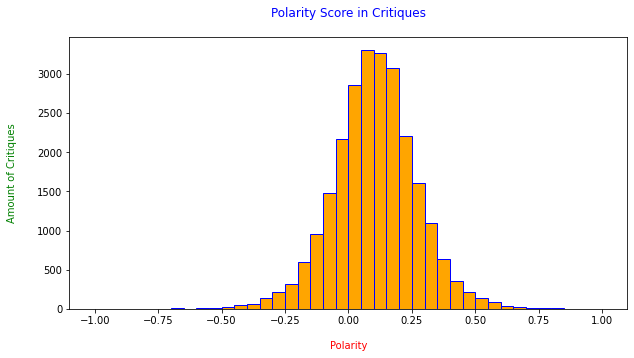

In [33]:
shuffled["polarity"].plot(kind = "hist", bins = 40, edgecolor = "blue", linewidth = 1, color = "orange", figsize = (10,5))
plt.title("Polarity Score in Critiques", color = "blue", pad = 20)
plt.xlabel("Polarity", labelpad = 15, color = "red")
plt.ylabel("Amount of Critiques", labelpad = 20, color = "green")

plt.show()

In [50]:
#pip install WordCloud

In [51]:
# Word Cloud
from wordcloud import WordCloud

In [54]:
# Use dropna() so the base DataFrame is not affected
Positive = shuffled[shuffled["Critiques"] == "Positive"].dropna()
Neutral = shuffled[shuffled["Critiques"] == "Neutral"].dropna()

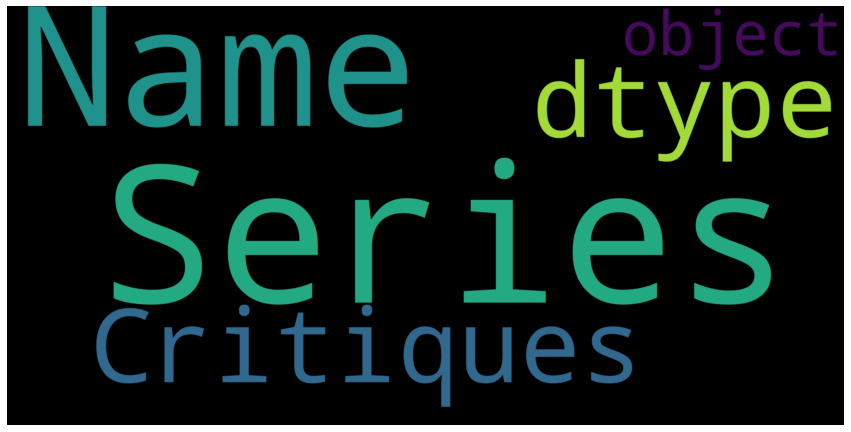

In [55]:
wordCloud = WordCloud(max_words = 50, width = 3000, height = 1500, stopwords = Stopwords).generate(str(Positive["Critiques"]))
plt.figure(figsize = (15, 15))
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

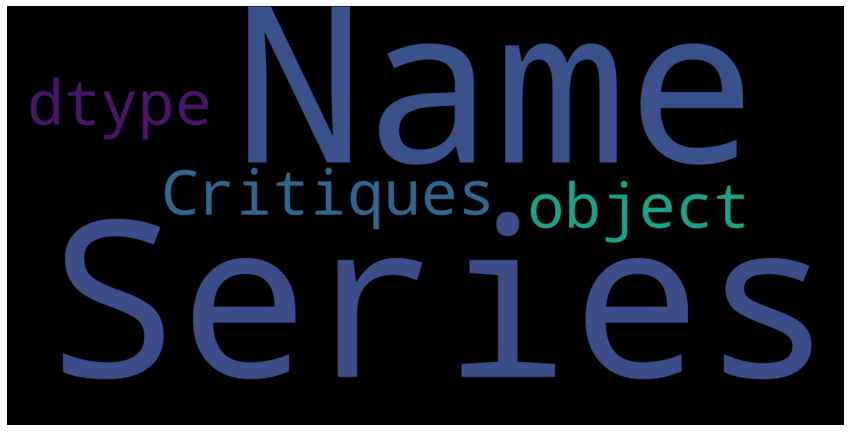

In [56]:
wordCloud = WordCloud(max_words = 50, width = 3000, height = 1500, stopwords = Stopwords).generate(str(Neutral["Critiques"]))
plt.figure(figsize = (15, 15))
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [63]:
X_Clean = shuffled.Critiques
y = shuffled.Reponse

In [64]:
X[:2]

0    Even though this movie starts off with the usu...
1    This is a VERY good movie. I give it a 10.<br ...
Name: Critiques, dtype: object

In [9]:
X[:2]

0    A perennial fixture in the IMDb Bottom 100, up...
1    Cage plays a drunk and gets high critically pr...
Name: Critiques, dtype: object

In [65]:
y[:2]

0    1
1    1
Name: Reponse, dtype: int64

# SPLIT DATA

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1, test_size= 0.2)

In [67]:
print('longuer de X train :', len(X_train))
print('longuer de y train :', len(y_train))
print('longuer de X test :', len(X_test))
print('longuer de y test :', len(y_test))

longuer de X train : 20000
longuer de y train : 20000
longuer de X test : 5000
longuer de y test : 5000


# VECTORISATION

In [101]:
vect = CountVectorizer(stop_words='english', ngram_range = (1,1), max_df = .80, min_df = 4)

In [102]:
vect.fit(X_train)

CountVectorizer(max_df=0.8, min_df=4, stop_words='english')

In [103]:
X_train_vect = vect.transform(X_train)
X_test_vect = vect.transform(X_test)

In [104]:
X_train_vect

<20000x26910 sparse matrix of type '<class 'numpy.int64'>'
	with 1698436 stored elements in Compressed Sparse Row format>

# Model Selection and Evaluation

In [106]:
# Model Building
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [107]:
DTree = DecisionTreeClassifier()
LogReg = LogisticRegression()
SVC = SVC()
RForest = RandomForestClassifier()
Bayes = BernoulliNB()
KNN = KNeighborsClassifier()

In [ ]:
Models = [DTree, LogReg, SVC, RForest, Bayes, KNN]
Models_Dict = {0: "Decision Tree", 1: "Logistic Regression", 2: "SVC", 3: "Random Forest", 4: "Naive Bayes", 5: "K-Neighbors"}

for i, model in enumerate(Models):
  print("{} Test Accuracy: {}".format(Models_Dict[i], cross_val_score(model, X_train_vect, y_train, cv = 10, scoring = "accuracy").mean()))

Decision Tree Test Accuracy: 0.7279000000000001


c:\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

Logistic Regression Test Accuracy: 0.8852499999999999


# Hyperparameter With GridSearch

In [ ]:
Param = {"C": np.logspace(-4, 4, 50), "penalty": ['l1', 'l2']}
grid_search = GridSearchCV(estimator = LogisticRegression(random_state = 42), param_grid = Param, scoring = "accuracy", cv = 10, verbose = 0, n_jobs = -1)

grid_search.fit(X_train_vect, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

# BEST MODEL

In [ ]:
Classifier = LogisticRegression(random_state = 42, C = 6866.488450042998, penalty = 'l2')
Classifier.fit(X_train, y_train)

Prediction = Classifier.predict(X_test)

# FIRST MODEL (MultinomialNB=)

### Create model MultinomialNB

In [75]:
NB = MultinomialNB()

In [76]:
NB.fit(X_train_vect, y_train)

MultinomialNB()

### Save model

In [77]:
import joblib

In [78]:
import joblib
#save model
joblib.dump(NB, 'NB.model')


['NB.model']

In [79]:

#load saved model
NB_Load = joblib.load('NB.model')

In [80]:
y_pred_load = NB_Load.predict(X_test_vect)

In [81]:
print('\nNaive Bayes')
print('Accuracy Score: ',metrics.accuracy_score(y_test,y_pred_load)*100,'%',sep='')


Naive Bayes
Accuracy Score: 86.64%


In [82]:
y_pred1 = NB.predict(X_test_vect)

In [83]:
print('\nNaive Bayes')
print('Accuracy Score: ',metrics.accuracy_score(y_test,y_pred1)*100,'%',sep='')


Naive Bayes
Accuracy Score: 86.64%


In [84]:
print('Confusion Matrix: ',metrics.confusion_matrix(y_test,y_pred1), sep = '\n')

Confusion Matrix: 
[[2237  278]
 [ 390 2095]]


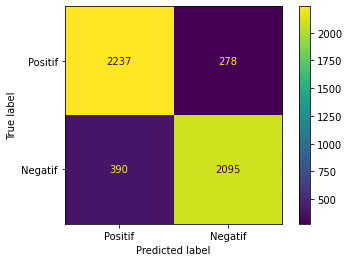

In [85]:
cm = confusion_matrix(y_test, y_pred1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Positif', 'Negatif'])
disp.plot()
plt.show()

# SECOND MODEL LogisticRegression

In [86]:
from sklearn import preprocessing
from sklearn.preprocessing import MaxAbsScaler

### Create model

#### Scale the data or Transform data

In [87]:
transformer = MaxAbsScaler().fit(X_train_vect)

In [88]:
transformer_Xtrain = transformer.transform(X_train_vect)

In [89]:
transformer_Xtrain

<20000x26910 sparse matrix of type '<class 'numpy.float64'>'
	with 1698436 stored elements in Compressed Sparse Row format>

In [90]:
#Accuracy using Logistic Regression Model
LR = LogisticRegression()
LR

LogisticRegression()

In [91]:
LR.fit(transformer_Xtrain, y_train)

LogisticRegression()

In [92]:
y_pred2 = LR.predict(X_test_vect)

In [93]:
print('\nLogistic Regression')
print('Accuracy Score: ',metrics.accuracy_score(y_test,y_pred2)*100,'%',sep='')


Logistic Regression
Accuracy Score: 86.53999999999999%


### CONFUSION MATRIX

In [94]:
print('Confusion Matrix: ',metrics.confusion_matrix(y_test,y_pred2), sep = '\n')

Confusion Matrix: 
[[2231  284]
 [ 389 2096]]


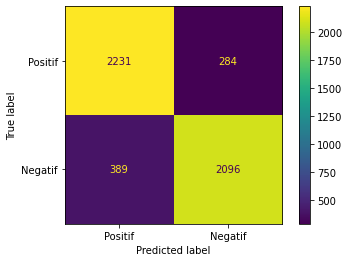

In [95]:
cm = confusion_matrix(y_test, y_pred2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Positif', 'Negatif'])
disp.plot()
plt.show()

# 3rd MODEL

### Create Model SVM

In [96]:
SVM = LinearSVC()

### FIT MODEL

In [97]:
SVM.fit(transformer_Xtrain, y_train)

LinearSVC()

### Predict model

In [98]:
y_pred3 = SVM.predict(X_test_vect)

In [99]:
print('\nSupport Vector Machine')
print('Accuracy Score: ',metrics.accuracy_score(y_test,y_pred3)*100,'%',sep='')


Support Vector Machine
Accuracy Score: 86.56%


### Confusion matrix

In [67]:
print('Confusion Matrix: ',metrics.confusion_matrix(y_test,y_pred3), sep = '\n')

Confusion Matrix: 
[[2180  348]
 [ 323 2149]]


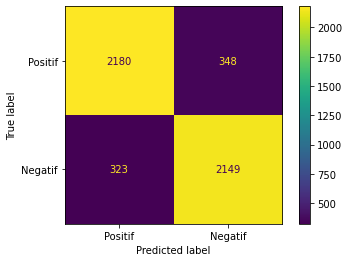

In [68]:
cm = confusion_matrix(y_test, y_pred3)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Positif', 'Negatif'])
disp.plot()
plt.show()

# 4rd MODEL KNN

### Create model

In [69]:
KNN = KNeighborsClassifier(n_neighbors = 2)

### Fit model


In [70]:
KNN.fit(X_train_vect, y_train)

KNeighborsClassifier(n_neighbors=2)

### Predict model

In [71]:
y_pred4 = KNN.predict(X_test_vect)

In [72]:
print('\nK Nearest Neighbors (NN = 3)')
print('Accuracy Score: ',metrics.accuracy_score(y_test,y_pred4)*100,'%',sep='')


K Nearest Neighbors (NN = 3)
Accuracy Score: 57.620000000000005%


### Confusion matrix

In [73]:
print('Confusion Matrix: ',metrics.confusion_matrix(y_test,y_pred4), sep = '\n')

Confusion Matrix: 
[[2269  259]
 [1860  612]]


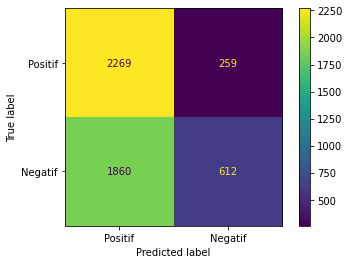

In [74]:
cm = confusion_matrix(y_test, y_pred4)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Positif', 'Negatif'])
disp.plot()
plt.show()

## KNN with Data transform

In [75]:
KNN2 = KNeighborsClassifier(n_neighbors = 2)

In [76]:
KNN2.fit(transformer_Xtrain, y_train)

KNeighborsClassifier(n_neighbors=2)

In [77]:
y_pred4_ = KNN2.predict(X_test_vect)

In [78]:
print('\nK Nearest Neighbors (NN = 3)')
print('Accuracy Score: ',metrics.accuracy_score(y_test,y_pred4_)*100,'%',sep='')


K Nearest Neighbors (NN = 3)
Accuracy Score: 71.48%


In [79]:
print('Confusion Matrix: ',metrics.confusion_matrix(y_test,y_pred4_), sep = '\n')

Confusion Matrix: 
[[2144  384]
 [1042 1430]]


In [80]:
KNN_scor = metrics.accuracy_score(y_test,y_pred4)*100
KNN_transform = metrics.accuracy_score(y_test,y_pred4_)*100
SVM_scor = metrics.accuracy_score(y_test,y_pred3)*100
LG_scor = metrics.accuracy_score(y_test,y_pred2)*100
NB_sco = metrics.accuracy_score(y_test,y_pred1)*100

In [88]:
models_train = {'MODEL': ['KNN', 'KNN transform', 'SVM', 'LRegression','NAIVE BAYES'], 'ACCURACY': [KNN_scor, KNN_transform, SVM_scor, LG_scor,NB_sco]}
model_fit = pd.DataFrame(models_train)

In [89]:
model_fit

,MODEL,ACCURACY
0,KNN,57.62
1,KNN transform,71.48
2,SVM,86.58
3,LRegression,87.06
4,NAIVE BAYES,85.70


In [90]:
model_fit.to_csv('model_result.csv', index=False)

In [91]:
pd.read_csv('model_result.csv')

,MODEL,ACCURACY
0,KNN,57.62
1,KNN transform,71.48
2,SVM,86.58
3,LRegression,87.06
4,NAIVE BAYES,85.70


# TEST MODEL LG

In [ ]:
import joblib

In [49]:
test = []
test.append(input())
print(test)
test_vect = vect.transform(test)
print(test_vect)
predLabel = NB_Load.predict(test_vect)
tags = ['Negative','Positive']
print("Le model à prédict que votre commentaire est ",tags[predLabel[0]])

['']


NameError: name 'vect' is not defined

In [ ]:
test = []
test.append(input())
test_vect = vect.transform(test)
predLabel = LR.predict(test_vect)
tags = ['Negative','Positive']
print("Le model à prédict que votre commentaire est ",tags[predLabel[0]])